In [1]:
# Install the Prophet
!pip install prophet

In [2]:
# Import the required libraries and dependencies
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from prophet import Prophet

In [3]:
import warnings
# Ignore warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [4]:
# Set crypto variable
crypto = 'XRP'

# Create crypto df
crypto_df = f'{crypto}_df'.lower()

In [5]:
# Store the crypto data in a Pandas DataFrame
# Set the "Date" column as the Datetime Index.
crypto_df = pd.read_csv(
    f'~/crypto-forecast/Resources/{crypto}-USD.csv',
    index_col='Date',
    parse_dates=True
).dropna()

# Sort by ascending date
crypto_df = crypto_df.sort_values(by="Date", ascending=True)

# Review the first and last five rows of the DataFrame
display(crypto_df.head())
display(crypto_df.tail())

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,0.217911,0.221791,0.214866,0.217488,0.217488,147916992
2017-11-10,0.218256,0.219068,0.205260,0.206483,0.206483,141032992
2017-11-11,0.205948,0.214456,0.205459,0.210430,0.210430,134503008
2017-11-12,0.210214,0.210214,0.195389,0.197339,0.197339,251175008
2017-11-13,0.197472,0.204081,0.197456,0.203442,0.203442,132567000


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-05-15,0.499889,0.519621,0.497450,0.519004,0.519004,1118098628
2024-05-16,0.519012,0.521331,0.513104,0.515698,0.515698,1152212983
2024-05-17,0.515699,0.528870,0.513998,0.523804,0.523804,1015239692
2024-05-18,0.523804,0.525628,0.519520,0.521390,0.521390,496850725
2024-05-19,0.521388,0.523517,0.514296,0.514913,0.514913,496901728


In [6]:
# Get last closing price
last_close_df = crypto_df.iloc[-1]
last_close_price = last_close_df['Close']
last_close_price

0.514913

In [7]:
crypto_df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.992355,0.989541,0.987515,0.987515,0.342280
High,0.992355,1.000000,0.985629,0.994189,0.994189,0.378928
Low,0.989541,0.985629,1.000000,0.992397,0.992397,0.313442
Close,0.987515,0.994189,0.992397,1.000000,1.000000,0.356531
Adj Close,0.987515,0.994189,0.992397,1.000000,1.000000,0.356531
Volume,0.342280,0.378928,0.313442,0.356531,0.356531,1.000000


In [8]:
# Create new df with just Close prices and Volume
df_close = crypto_df[['Close', 'Volume']]

In [9]:
df_close.name = 'Close'
df_close

,Close,Volume
Date,,
2017-11-09,0.217488,147916992
2017-11-10,0.206483,141032992
2017-11-11,0.210430,134503008
2017-11-12,0.197339,251175008
2017-11-13,0.203442,132567000
...,...,...
2024-05-15,0.519004,1118098628
2024-05-16,0.515698,1152212983
2024-05-17,0.523804,1015239692


In [10]:
# Create a copy of the DataFrame to avoid the SettingWithCopyWarning
df_close_ma = df_close.copy()

# Calculate 10-day Simple Moving Average (SMA)
df_close_ma.loc[:, 'SMA10'] = df_close_ma['Close'].rolling(10).mean()

# Calculate 30-day Simple Moving Average (SMA)
df_close_ma.loc[:, 'SMA30'] = df_close_ma['Close'].rolling(30).mean()

# Calculate 50-day Simple Moving Average (SMA)
df_close_ma.loc[:, 'SMA50'] = df_close_ma['Close'].rolling(50).mean()

# Remove NULL values
df_close_ma.dropna(inplace=True)

In [11]:
# Review the first and last five rows of the DataFrame
display(df_close_ma.head())
display(df_close_ma.tail())

,Close,Volume,SMA10,SMA30,SMA50
Date,,,,,
2017-12-28,1.43088,2843300096,1.125918,0.639608,0.476235
2017-12-29,2.21460,7545739776,1.268252,0.705326,0.516177
2017-12-30,2.15902,8108389888,1.406558,0.768930,0.555228
2017-12-31,2.30057,4642079744,1.517309,0.837093,0.597031
2018-01-01,2.39103,1894230016,1.642584,0.908277,0.640905


,Close,Volume,SMA10,SMA30,SMA50
Date,,,,,
2024-05-15,0.519004,1118098628,0.513513,0.517983,0.545716
2024-05-16,0.515698,1152212983,0.511028,0.518616,0.543790
2024-05-17,0.523804,1015239692,0.510934,0.519582,0.541775
2024-05-18,0.521390,496850725,0.511350,0.520195,0.539588
2024-05-19,0.514913,496901728,0.510739,0.520566,0.537450


<Axes: xlabel='Date'>

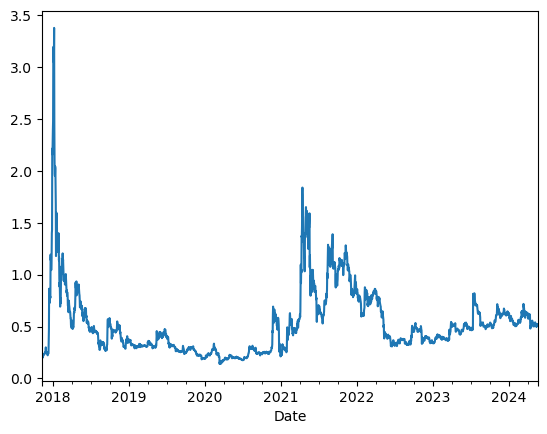

In [12]:
# Plot Close
df_close['Close'].plot()

In [13]:
## Create a Time Series Model with Prophet

In [14]:
# Using the DataFrame, reset the index so the date information is no longer the index
df_close = df_close.reset_index()

In [15]:
# Label the columns ds and y so that the syntax is recognized by Prophet
df_close.rename(columns={'Date':'ds','Close':'y'}, inplace=True)

# Drop an NaN values from the prophet_df DataFrame
df_close.dropna()

# View the first and last five rows of the DataFrame
df_close

,ds,y,Volume
0,2017-11-09,0.217488,147916992
1,2017-11-10,0.206483,141032992
2,2017-11-11,0.210430,134503008
3,2017-11-12,0.197339,251175008
4,2017-11-13,0.203442,132567000
...,...,...,...
2379,2024-05-15,0.519004,1118098628
2380,2024-05-16,0.515698,1152212983
2381,2024-05-17,0.523804,1015239692
2382,2024-05-18,0.521390,496850725


In [16]:
# Call the Prophet function, store as an object
crypto_model = Prophet()

In [17]:
# Fit the time-series model.
crypto_model.fit(df_close)

18:51:06 - cmdstanpy - INFO - Chain [1] start processing
18:51:06 - cmdstanpy - INFO - Chain [1] done processing


In [18]:
# Create a future dataframe to hold predictions
# Make the prediction go out 30 days
crypto_future = crypto_model.make_future_dataframe(periods = 90, freq = 'd')

# View the last five rows of the DataFrame
crypto_future.tail(5)

,ds
2469,2024-08-13
2470,2024-08-14
2471,2024-08-15
2472,2024-08-16
2473,2024-08-17


In [19]:
# Make the predictions for the data using the DataFrame
crypto_forecast = crypto_model.predict(crypto_future)

# Display the first five rows of the DataFrame
crypto_forecast.tail(30)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2444,2024-07-19,0.624627,0.324718,0.843893,0.607206,0.643494,-0.055209,-0.055209,-0.055209,0.000141,0.000141,0.000141,-0.055350,-0.055350,-0.055350,0.0,0.0,0.0,0.569417
2445,2024-07-20,0.624969,0.307723,0.840710,0.606938,0.644629,-0.051813,-0.051813,-0.051813,0.002360,0.002360,0.002360,-0.054173,-0.054173,-0.054173,0.0,0.0,0.0,0.573156
2446,2024-07-21,0.625312,0.306583,0.843127,0.606562,0.645607,-0.051897,-0.051897,-0.051897,0.001082,0.001082,0.001082,-0.052979,-0.052979,-0.052979,0.0,0.0,0.0,0.573414
2447,2024-07-22,0.625654,0.323995,0.838717,0.606124,0.646698,-0.051182,-0.051182,-0.051182,0.000557,0.000557,0.000557,-0.051738,-0.051738,-0.051738,0.0,0.0,0.0,0.574473
2448,2024-07-23,0.625997,0.308444,0.836248,0.605827,0.647843,-0.052039,-0.052039,-0.052039,-0.001623,-0.001623,-0.001623,-0.050416,-0.050416,-0.050416,0.0,0.0,0.0,0.573957
2449,2024-07-24,0.626339,0.309804,0.831852,0.605788,0.648880,-0.050509,-0.050509,-0.050509,-0.001526,-0.001526,-0.001526,-0.048983,-0.048983,-0.048983,0.0,0.0,0.0,0.575830
2450,2024-07-25,0.626682,0.308900,0.827418,0.605778,0.650052,-0.048400,-0.048400,-0.048400,-0.000990,-0.000990,-0.000990,-0.047410,-0.047410,-0.047410,0.0,0.0,0.0,0.578282
2451,2024-07-26,0.627024,0.312428,0.833033,0.605371,0.651173,-0.045531,-0.045531,-0.045531,0.000141,0.000141,0.000141,-0.045672,-0.045672,-0.045672,0.0,0.0,0.0,0.581493
2452,2024-07-27,0.627367,0.329111,0.858308,0.605168,0.652293,-0.041391,-0.041391,-0.041391,0.002360,0.002360,0.002360,-0.043751,-0.043751,-0.043751,0.0,0.0,0.0,0.585975
2453,2024-07-28,0.627709,0.328580,0.862043,0.604577,0.653570,-0.040550,-0.040550,-0.040550,0.001082,0.001082,0.001082,-0.041632,-0.041632,-0.041632,0.0,0.0,0.0,0.587159


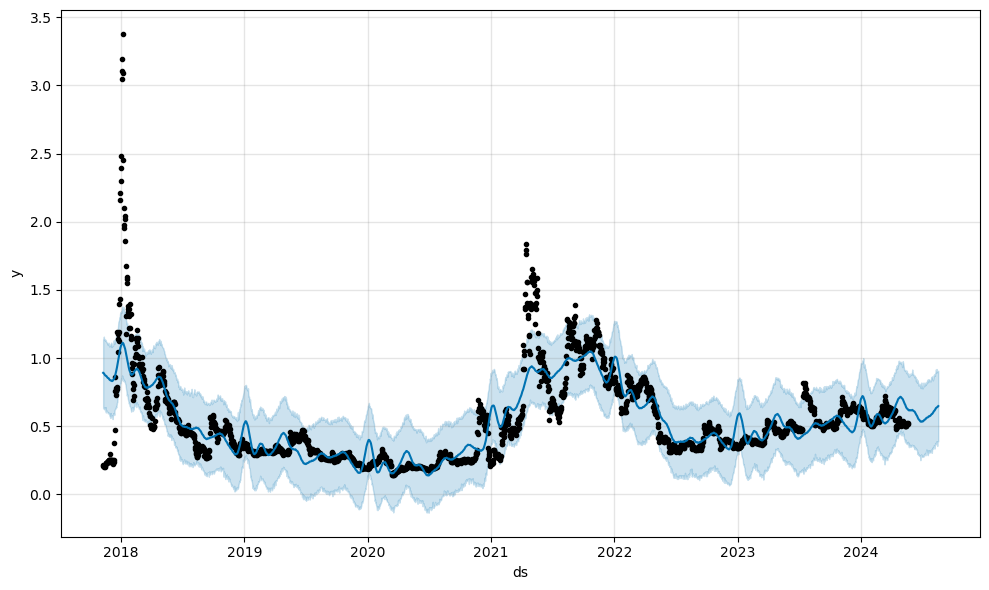

In [20]:
# Plot the Prophet predictions for the data
fig1 = crypto_model.plot(crypto_forecast)

In [21]:
# Set the index in the forecast DataFrame to the ds datetime column
crypto_forecast = crypto_forecast.set_index('ds')

In [22]:
# View only the yhat,yhat_lower and yhat_upper columns from the forecast DataFrame
crypto_forecast[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-90:,:]

,yhat,yhat_lower,yhat_upper
ds,,,
2024-05-20,0.621021,0.361616,0.864653
2024-05-21,0.617248,0.379338,0.885948
2024-05-22,0.616209,0.346192,0.865419
2024-05-23,0.616021,0.361548,0.870016
2024-05-24,0.616780,0.350054,0.866562
...,...,...,...
2024-08-13,0.636943,0.389910,0.898988
2024-08-14,0.639261,0.355170,0.903222
2024-08-15,0.641668,0.388248,0.902176


In [23]:
# Rename columns
crypto_forecast.rename(columns={'yhat':'mid trend price','yhat_lower':'lower trend price','yhat_upper':'upper trend price'}, inplace=True)

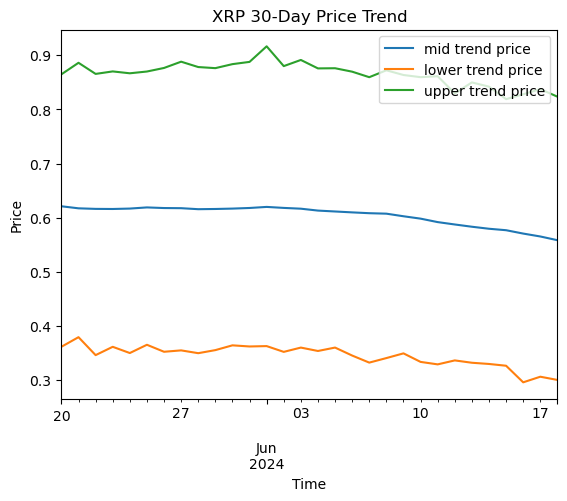

In [24]:
# From the forecast DataFrame, plot the data to visualize
# the yhat, yhat_lower, and yhat_upper columns over the last 30 days
crypto_forecast[['mid trend price', 'lower trend price', 'upper trend price']].iloc[-90:-60,:].plot()
plt.xlabel('Time')
plt.ylabel('Price')
plt.title(f'{crypto} 30-Day Price Trend')    
plt.show()

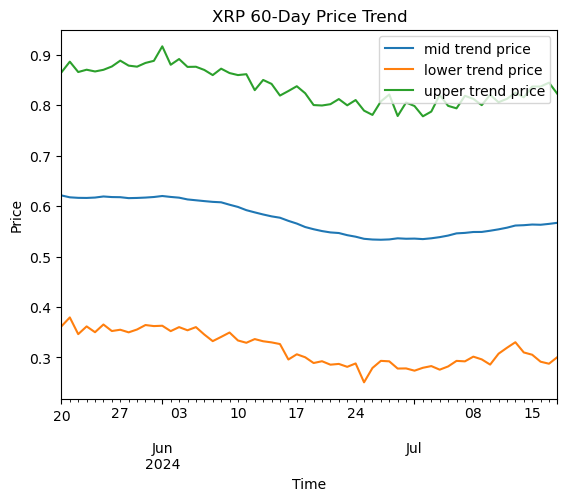

In [25]:
# From the forecast DataFrame, plot the data to visualize
# the yhat, yhat_lower, and yhat_upper columns over the last 30 days
crypto_forecast[['mid trend price', 'lower trend price', 'upper trend price']].iloc[-90:-30,:].plot()
plt.xlabel('Time')
plt.ylabel('Price')
plt.title(f'{crypto} 60-Day Price Trend')    
plt.show()

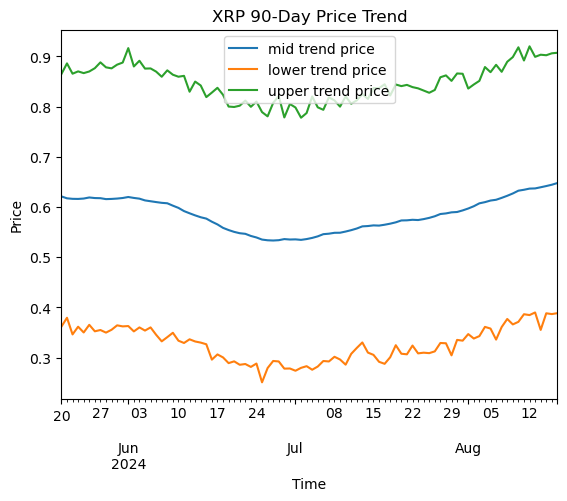

In [26]:
# From the forecast DataFrame, plot the data to visualize
# the yhat, yhat_lower, and yhat_upper columns over the last 30 days
crypto_forecast[['mid trend price', 'lower trend price', 'upper trend price']].iloc[-90:,:].plot()
plt.xlabel('Time')
plt.ylabel('Price')
plt.title(f'{crypto} 90-Day Price Trend')    
plt.show()

In [27]:
# Retrieve last closing price
last_close_price

0.514913

In [28]:
# Retreive tomorrow's mid trend price forecast
tommorow_mid_trend_price = crypto_forecast['mid trend price'].iloc[-90]
tommorow_mid_trend_price

0.6210213644523774

In [29]:
# Retrieve mid trend price in 30 days
mid_trend_price_in_30 = crypto_forecast['mid trend price'].iloc[-60]
mid_trend_price_in_30

0.5540333727083064

In [30]:
# Retrieve mid trend price in 60 days
mid_trend_price_in_60 = crypto_forecast['mid trend price'].iloc[-30]
mid_trend_price_in_60

0.5694173321756449

In [31]:
# Retrieve mid trend price in 90 days
mid_trend_price_in_90 = crypto_forecast['mid trend price'].iloc[-1]
mid_trend_price_in_90

0.6476553036669062

In [32]:
# Calculate expected gain/loss between mid trend price in 30 days and last close price
percent_diff_30 = ((mid_trend_price_in_30)/(last_close_price))-1
percent_diff_30.round(3)

0.076

In [33]:
# Calculate expected gain/loss between mid trend price in 60 days and last close price
percent_diff_60 = ((mid_trend_price_in_60)/(last_close_price))-1
percent_diff_60.round(3)

0.106

In [34]:
# Calculate expected gain/loss between mid trend price in 90 days and last close price
percent_diff_90 = ((mid_trend_price_in_90)/(last_close_price))-1
percent_diff_90.round(3)

0.258

In [35]:
# Reset the index in the forecast DataFrame
crypto_forecast = crypto_forecast.reset_index()

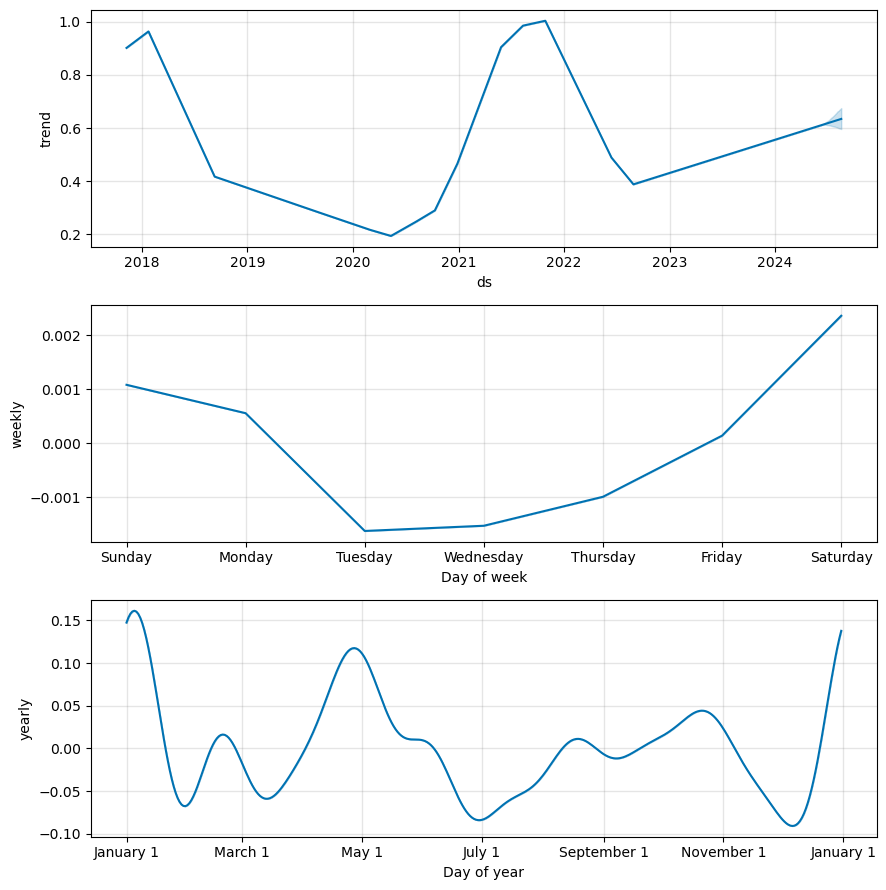

In [36]:
# Use the plot_components function to visualize the forecast results
# for the forecast DataFrame
fig2 = crypto_model.plot_components(crypto_forecast)

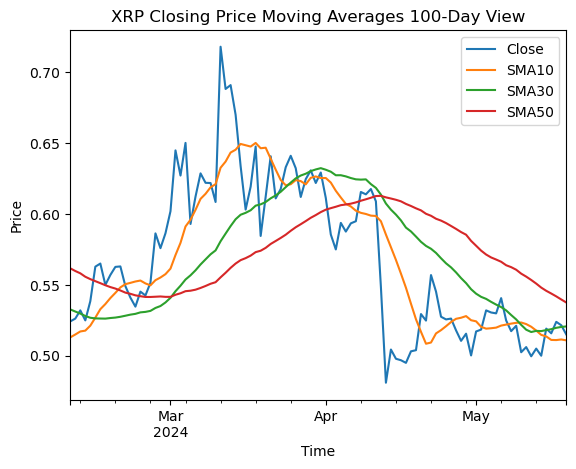

In [37]:
df_last_100 = df_close_ma.iloc[-100:]
df_last_100[['Close', 'SMA10', 'SMA30', 'SMA50']].plot()
plt.xlabel('Time')
plt.ylabel('Price')
plt.title(f'{crypto} Closing Price Moving Averages 100-Day View')    
plt.show()

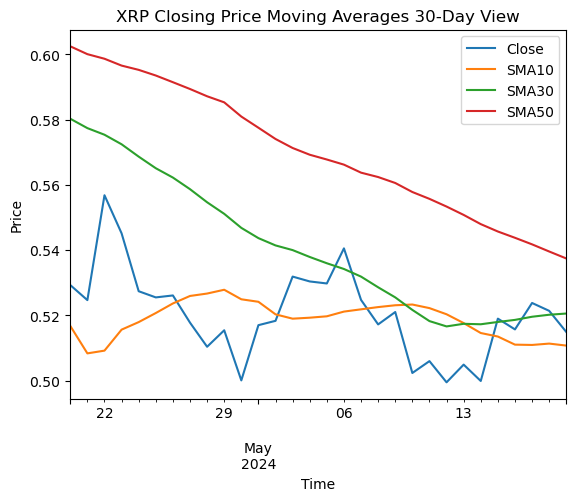

In [38]:
df_last_100 = df_close_ma.iloc[-30:]
df_last_100[['Close', 'SMA10', 'SMA30', 'SMA50']].plot()
plt.xlabel('Time')
plt.ylabel('Price')
plt.title(f'{crypto} Closing Price Moving Averages 30-Day View')    
plt.show()

In [39]:
# import module
from datetime import datetime
 
# get current date and time
current_datetime = datetime.now().strftime("%Y-%m-%d")
print("Current date & time : ", current_datetime)
 
# convert datetime obj to string
str_current_datetime = str(current_datetime)
 
# create a file object along with extension
#file_name = f'{crypto} '+str_current_datetime+".txt"
file_name = str_current_datetime+".csv"
file = open(file_name, 'a')
 
print("File created : ", file.name)
file.close()

Current date & time :  2024-05-19
File created :  2024-05-19.csv


In [40]:
f = open(f'{file_name}', "a")
f.writelines([f'{crypto},{last_close_price},{percent_diff_30},{percent_diff_60},{percent_diff_90}\n'])
f.close()

In [41]:
f = open(f'{file_name}', "r")
print(f.read())

ADA,0.481067,-0.006935356560101691,-0.07859463805561773,0.23472349758660838
BNB,580.305542,-0.34535988531321604,-0.3403273855834782,-0.29106901029282883
BONK,2.8e-05,0.1292127878224536,0.2630430622648412,0.38814028120395916
BTC,67051.88,-0.23323891802030206,-0.21230307524907965,-0.17587733204204037
DOGE,0.152578,-0.2473798803862568,-0.3174264585592441,-0.169114542247355
ETH,3094.12,-0.05599603182651869,-0.04100077989984452,0.04719570091164238
PEPE,1e-05,0.1936552667556517,0.4219240250195795,0.6253332092778225
SHIB,2.5e-05,-0.19473091361435269,-0.14662759930253433,-0.08482022409859769
SOL,172.28,0.024117864650146092,0.09548325020809445,0.1497086739715663
XRP,0.514913,0.07597472331890343,0.10585153642585254,0.2577955958907743

